# Imports and load data

In [2]:
import matplotlib.pyplot as plt
import mne
import seaborn as sns
import torch
from braindecode import EEGClassifier
from sklearn.pipeline import make_pipeline
from skorch.callbacks import EarlyStopping, EpochScoring
from skorch.dataset import ValidSplit

from moabb.datasets import BNCI2014_001
from moabb.evaluations import CrossSessionEvaluation
from moabb.paradigms import MotorImagery
from moabb.utils import setup_seed

    
mne.set_log_level(False)

# Print Information PyTorch
print(f"Torch Version: {torch.__version__}")

# Set up GPU if it is there
cuda = torch.cuda.is_available()
device = "cuda" if cuda else "cpu"
print("GPU is", "AVAILABLE" if cuda else "NOT AVAILABLE")

seed = 42
setup_seed(seed)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Hyperparameter

# learning rate 1e-4

# batch = 2^7
LEARNING_RATE = 0.0625 * 0.01  # parameter taken from Braindecode
WEIGHT_DECAY = 0  # parameter taken from Braindecode
BATCH_SIZE = 64  # parameter taken from BrainDecode
EPOCH = 20 #3000
PATIENCE = 100
fmin = 4
fmax = 100
tmin = 0
tmax = None


dataset = BNCI2014_001()
paradigm = MotorImagery(
    fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax
)
subjects = [1,2,3,4,5,6,7,8,9]
X, _, _ = paradigm.get_data(dataset=dataset, subjects=subjects)


Choosing from all possible events


Torch Version: 2.2.2
GPU is NOT AVAILABLE
We try to set the tensorflow seeds, but it seems that tensorflow is not installed. Please refer to `https://www.tensorflow.org/` to install if you need to use this deep learning module.


/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning

# Classifier

In [3]:
from shallow import CollapsedShallowNetPrivate, CollapsedShallowNet, SubjectAwareModel

clf = EEGClassifier(
    module=SubjectAwareModel,  
    module__n_chans=X.shape[1],  # number of input channels
    module__n_outputs=len(dataset.event_id),  # number of output classes
    module__n_times=X.shape[2],  # length of the input signal in time points
    optimizer=torch.optim.Adam,
    optimizer__lr=LEARNING_RATE,
    batch_size=BATCH_SIZE,
    max_epochs=EPOCH,
    train_split=ValidSplit(0.2, random_state=seed),
    device=device,
    callbacks=[
        EarlyStopping(monitor="valid_loss", patience=PATIENCE),
        EpochScoring(
            scoring="accuracy", on_train=True, name="train_acc", lower_is_better=False
        ),
        EpochScoring(
            scoring="accuracy", on_train=False, name="valid_acc", lower_is_better=False
        ),
    ],
    verbose=1,
)

clf2 = EEGClassifier(
    module=CollapsedShallowNetPrivate,  
    module__n_chans=X.shape[1],  # number of input channels
    module__n_outputs=len(dataset.event_id),  # number of output classes
    module__n_times=X.shape[2],  # length of the input signal in time points
    optimizer=torch.optim.Adam,
    optimizer__lr=LEARNING_RATE,
    batch_size=BATCH_SIZE,
    max_epochs=EPOCH,
    train_split=ValidSplit(0.2, random_state=seed),
    device=device,
    callbacks=[
        EarlyStopping(monitor="valid_loss", patience=PATIENCE),
        EpochScoring(
            scoring="accuracy", on_train=True, name="train_acc", lower_is_better=False
        ),
        EpochScoring(
            scoring="accuracy", on_train=False, name="valid_acc", lower_is_better=False
        ),
    ],
    verbose=1,
)

clf3 = EEGClassifier(
    module=CollapsedShallowNet,  
    module__n_chans=X.shape[1],  # number of input channels
    module__n_outputs=len(dataset.event_id),  # number of output classes
    module__n_times=X.shape[2],  # length of the input signal in time points
    optimizer=torch.optim.Adam,
    optimizer__lr=LEARNING_RATE,
    batch_size=BATCH_SIZE,
    max_epochs=EPOCH,
    train_split=ValidSplit(0.2, random_state=seed),
    device=device,
    callbacks=[
        EarlyStopping(monitor="valid_loss", patience=PATIENCE),
        EpochScoring(
            scoring="accuracy", on_train=True, name="train_acc", lower_is_better=False
        ),
        EpochScoring(
            scoring="accuracy", on_train=False, name="valid_acc", lower_is_better=False
        ),
    ],
    verbose=1,
)

# Create a pipeline with the classifier
#pipes = {"CollapsedShallowNetPrivate": make_pipeline(clf),}
pipes = { "CollapsedShallowNet": make_pipeline(clf3), "CollapsedShallowNetPrivate": make_pipeline(clf2), "SubjectAwareModel": make_pipeline(clf),}

# Evaluation

/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.2711        1.3787       0.2874        1.3699  3.3573
      2       0.3153        1.3502       0.3321        1.3569  3.2729
      3       0.3771        1.3128       0.3502        1.3342  2.7834
      4       0.4115        1.2850       0.3829        1.3021  2.7885
      5       0.4360        1.2500       0.4614        1.2771  2.7540
      6       0.4507        1.2343       0.4312        1.2730  2.8049
      7       0.4712        1.2103       0.4565        1.2180  2.8805
      8       0.4828        1.1905       0.5000        1.1892  3.6520
      9       0.4770        1.1720       0.4758        1.1876  3.5065
     10       0.4966        1.1663       0.4807        1.1802  3.2064
     11       0.4936        1.1488       0.5048        1.1550  3.0546
     12       0.5126        1.1333       0.5036        1.1407  3.9305
     13       0.5159

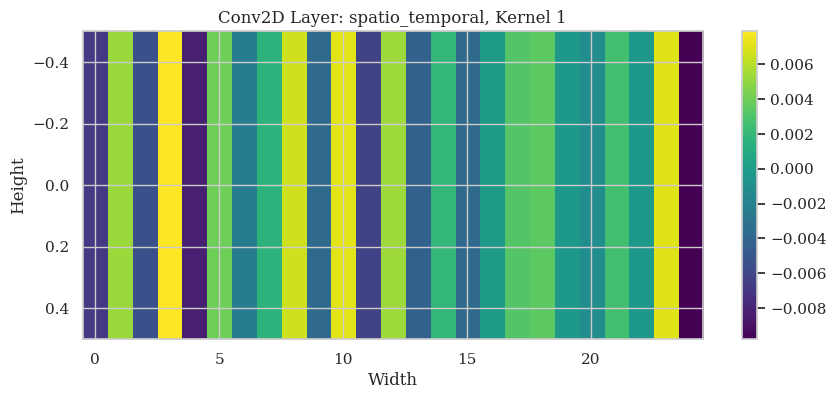

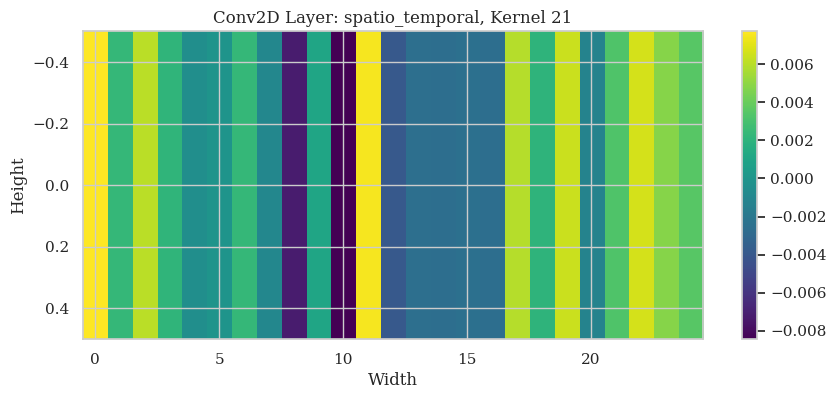

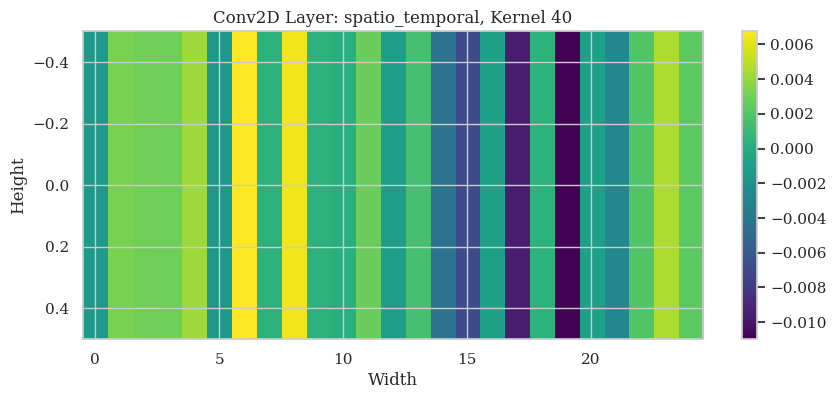

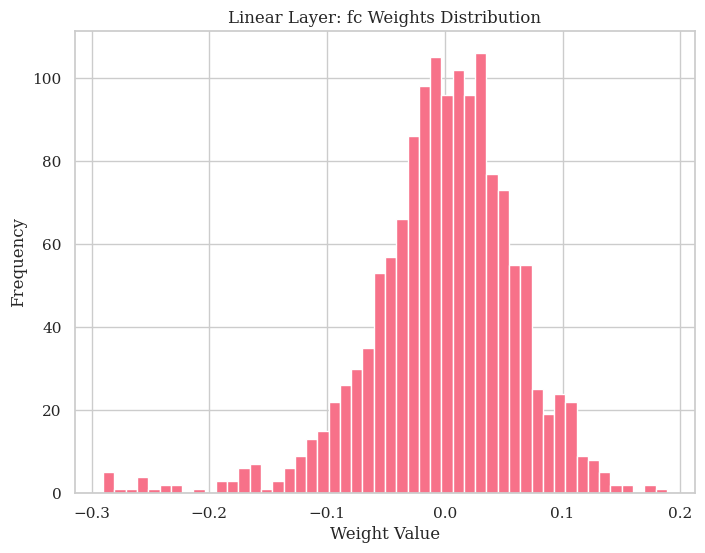

Saving Pytorch model


BNCI2014-001-AllRuns: 100%|██████████| 1/1 [01:23<00:00, 83.30s/it]


      score       time  samples  cross_fold  n_test_samples subject session  \
0  0.647059  65.472557   4140.0         0.0            51.0       1  0train   
1  0.661538  65.472557   4140.0         0.0            65.0       1   1test   
2  0.228070  65.472557   4140.0         0.0            57.0       2  0train   
3  0.288136  65.472557   4140.0         0.0            59.0       2   1test   
4  0.698113  65.472557   4140.0         0.0            53.0       3  0train   

   channels  n_sessions       dataset             pipeline  
0        22           2  BNCI2014-001  CollapsedShallowNet  
1        22           2  BNCI2014-001  CollapsedShallowNet  
2        22           2  BNCI2014-001  CollapsedShallowNet  
3        22           2  BNCI2014-001  CollapsedShallowNet  
4        22           2  BNCI2014-001  CollapsedShallowNet  


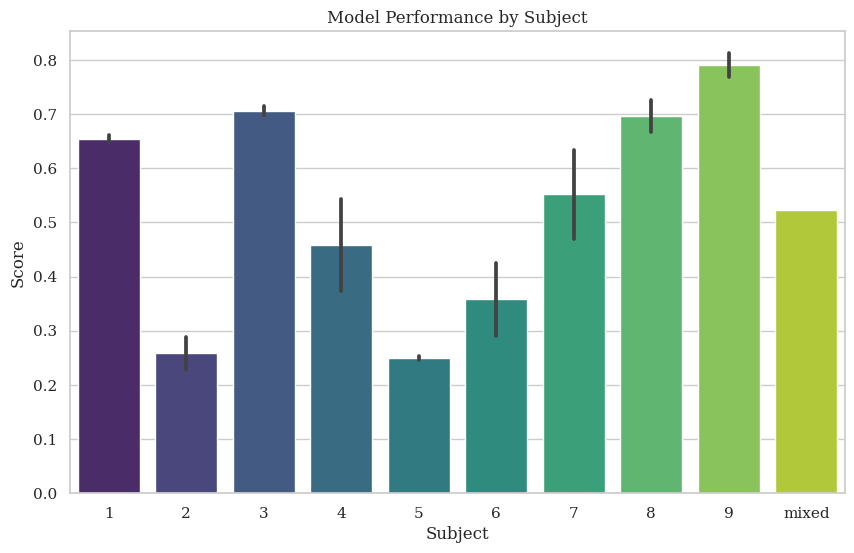

/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.2574        1.3879       0.2947        1.3556  3.5554
      2       0.3465        1.3342       0.3357        1.3198  3.5338
      3       0.3729        1.2985       0.3877        1.2803  3.5956
      4       0.4231        1.2479       0.4312        1.2331  3.5725
      5       0.4638        1.1996       0.4360        1.1985  3.5125
      6       0.5070        1.1501       0.4698        1.1589  3.5842
      7       0.5202        1.1184       0.4746        1.1314  3.5595
      8       0.5365        1.0844       0.5036        1.0996  3.5357
      9       0.5594        1.0588       0.5145        1.0779  3.6044
     10       0.5689        1.0314       0.5242        1.0608  3.5617
     11       0.5784        0.9966       0.5157        1.0452  3.5242
     12       0.5959        0.9780       0.5362        1.0322  3.6018
     13       0.6042

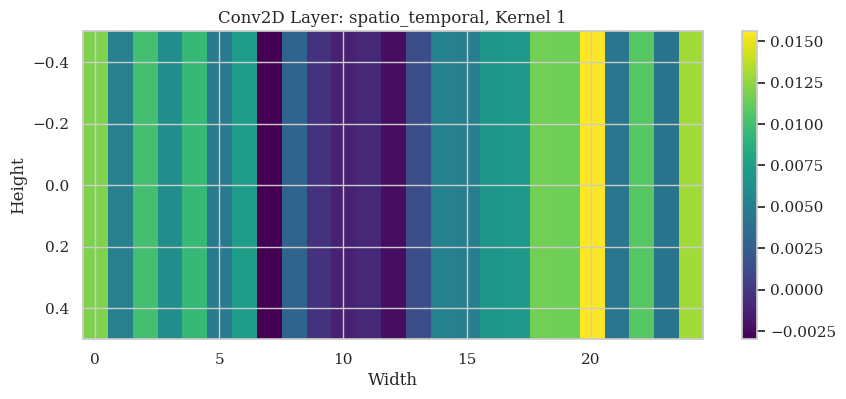

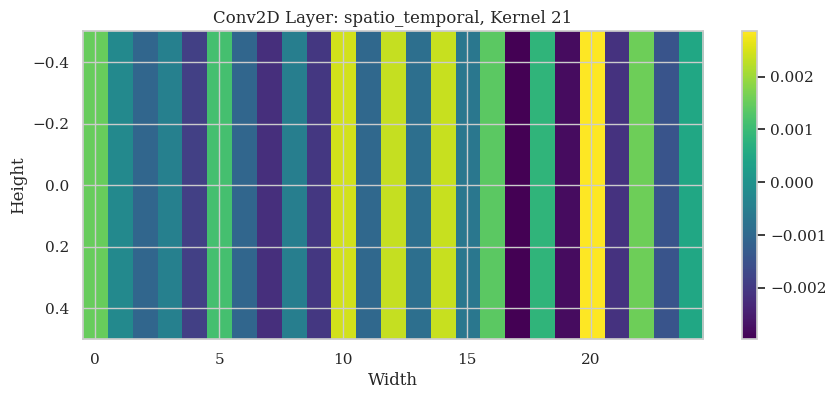

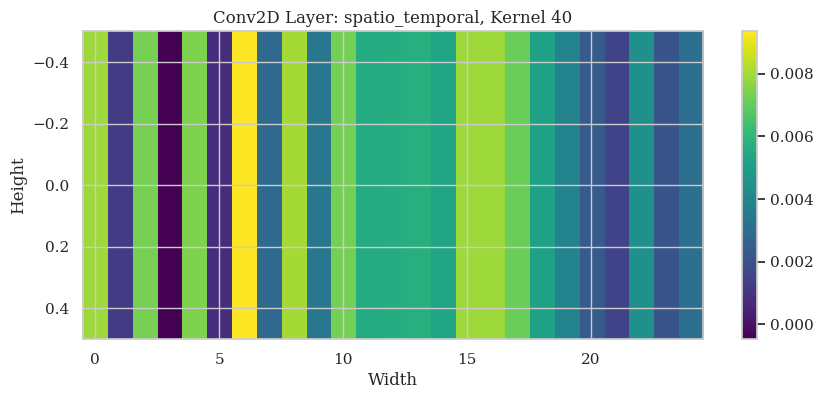

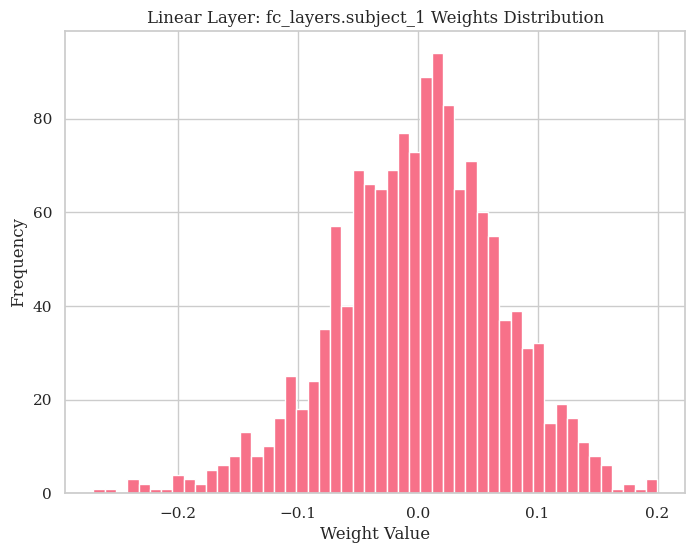

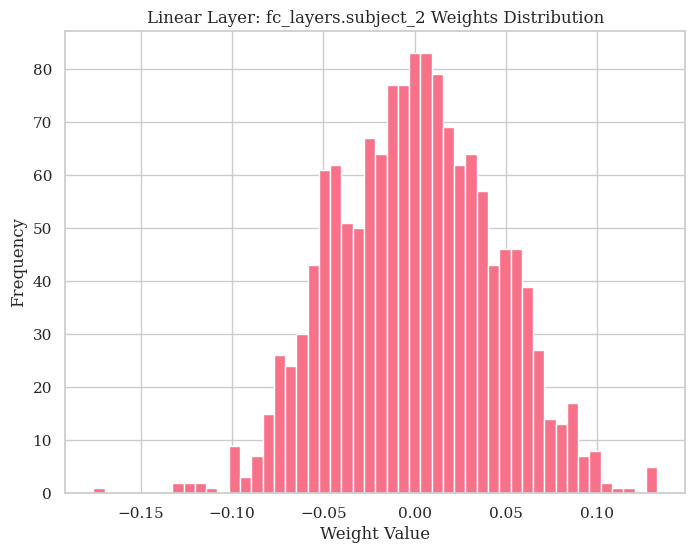

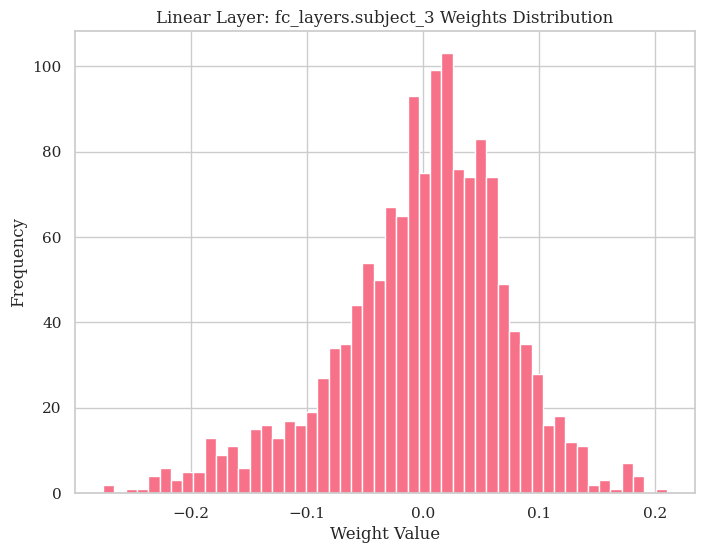

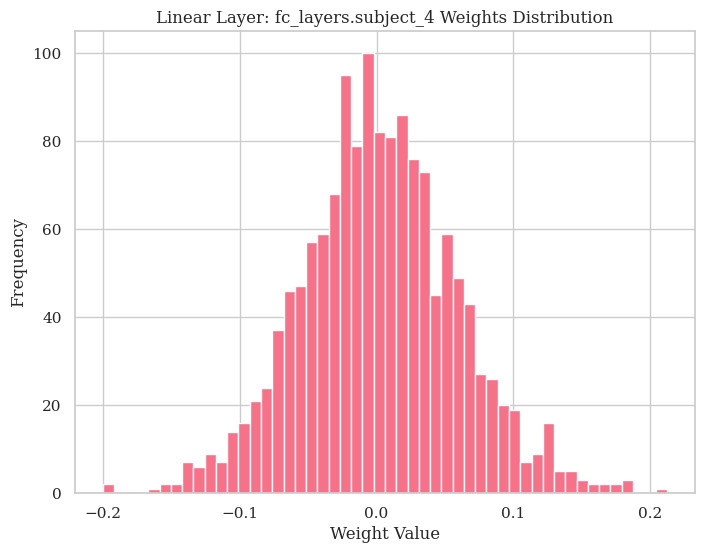

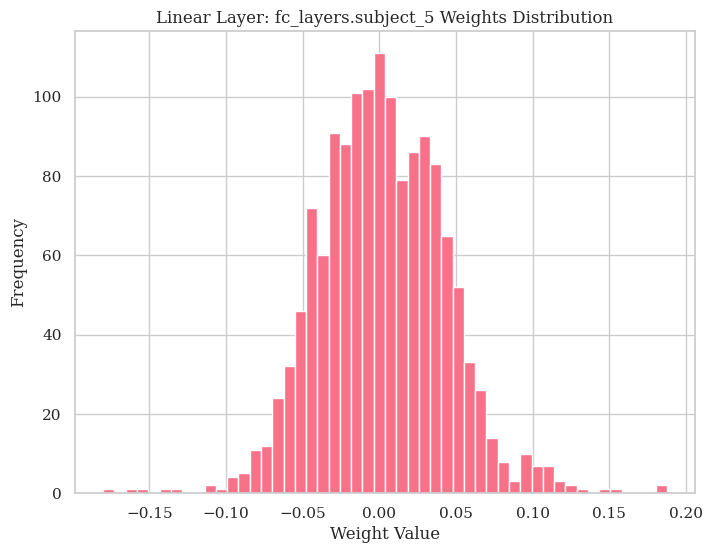

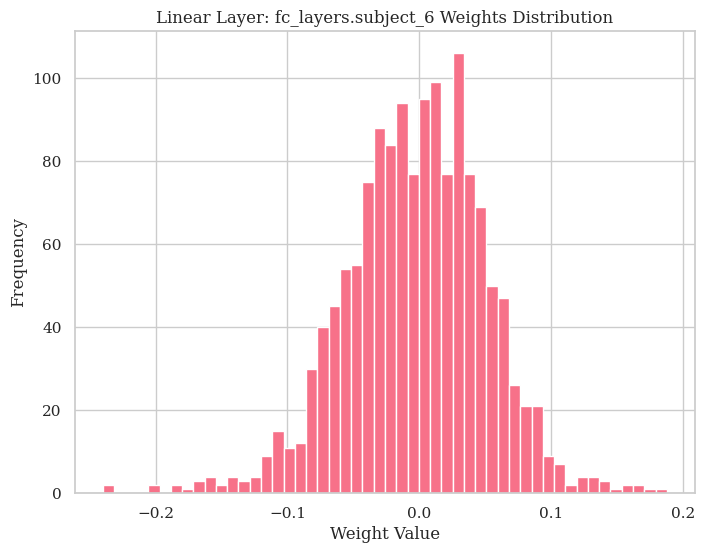

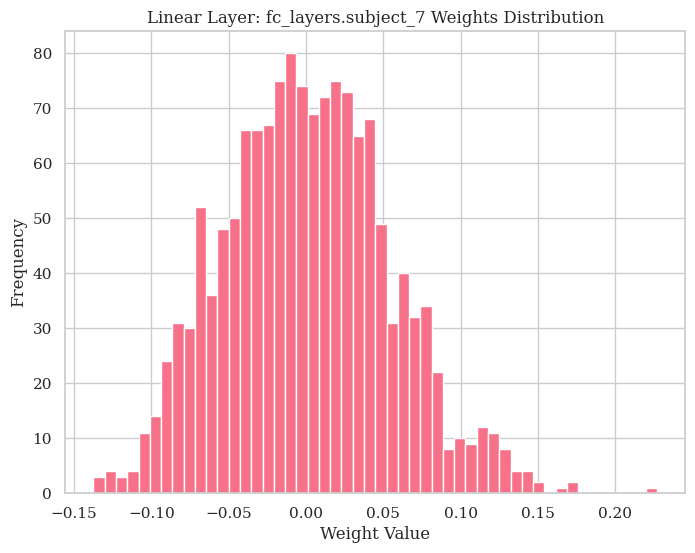

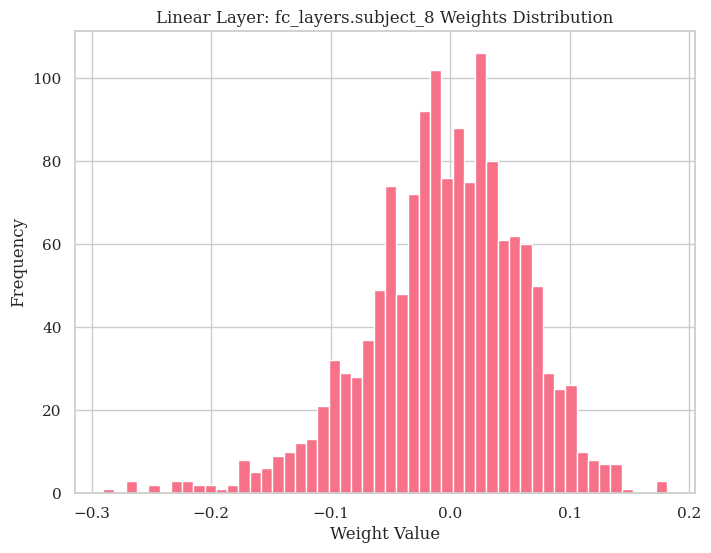

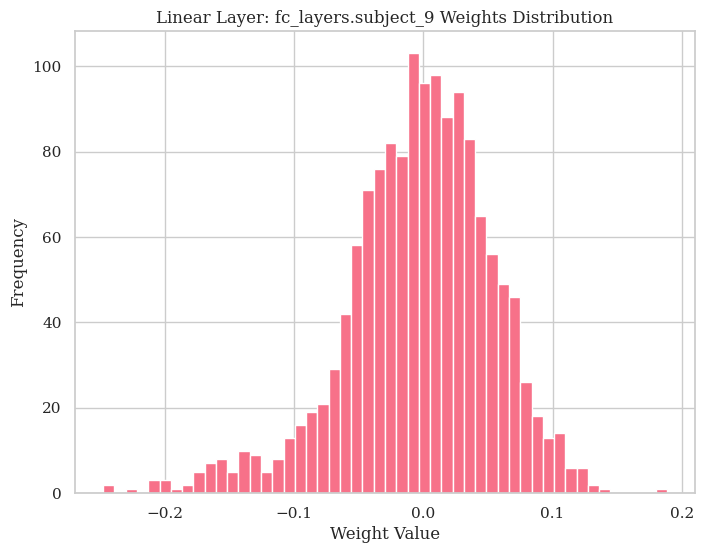

Saving Pytorch model


BNCI2014-001-AllRuns: 100%|██████████| 1/1 [01:32<00:00, 92.35s/it]


      score       time  samples  cross_fold  n_test_samples subject session  \
0  0.711864  73.244003   4140.0         0.0            59.0       1  0train   
1  0.666667  73.244003   4140.0         0.0            57.0       1   1test   
2  0.295082  73.244003   4140.0         0.0            61.0       2  0train   
3  0.363636  73.244003   4140.0         0.0            55.0       2   1test   
4  0.709091  73.244003   4140.0         0.0            55.0       3  0train   

   channels  n_sessions       dataset                    pipeline  
0        22           2  BNCI2014-001  CollapsedShallowNetPrivate  
1        22           2  BNCI2014-001  CollapsedShallowNetPrivate  
2        22           2  BNCI2014-001  CollapsedShallowNetPrivate  
3        22           2  BNCI2014-001  CollapsedShallowNetPrivate  
4        22           2  BNCI2014-001  CollapsedShallowNetPrivate  


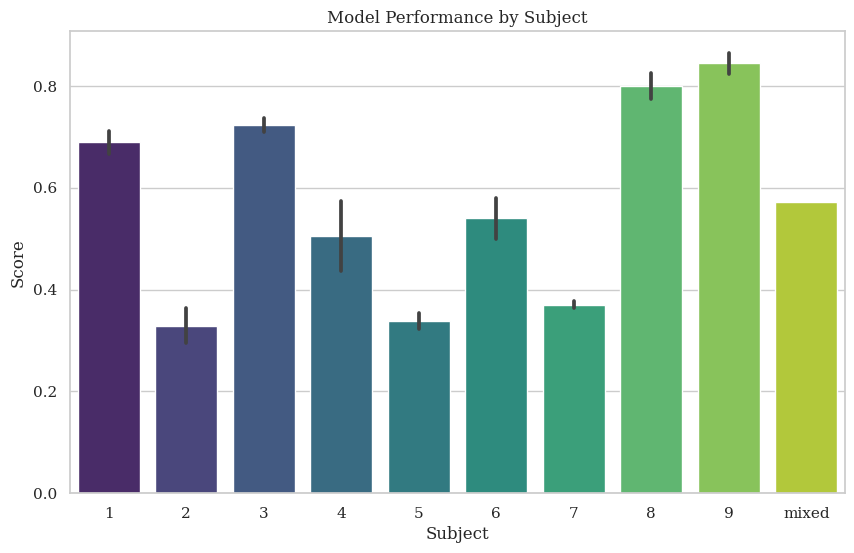

/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.3073        1.8220       0.3249        1.7407  2.2560
      2       0.5025        1.2587       0.3176        1.7620  2.1877
      3       0.5849        1.0655       0.3406        1.7650  2.2566
      4       0.6379        0.9228       0.3514        1.9275  2.1662
      5       0.6826        0.7985       0.3659        1.8350  2.2232
      6       0.7224        0.7129       0.3527        1.9737  2.1587
      7       0.7325        0.6744       0.3804        2.0210  2.2651
      8       0.7540        0.6468       0.3841        2.0107  2.1740
      9       0.7669        0.6115       0.3792        2.1046  2.2279
     10       0.7914        0.5461       0.3961        2.1347  2.1643
     11       0.8082        0.5118       0.3623        2.1866  2.2892
     12       0.8131        0.4963       0.3925        2.2307  2.2357
     13       0.8263

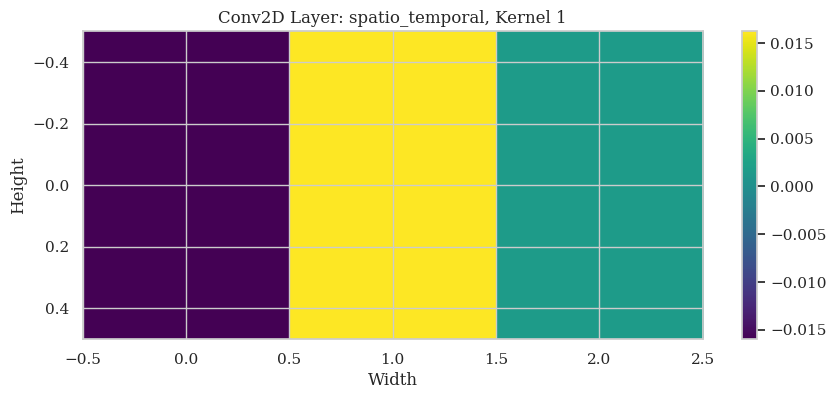

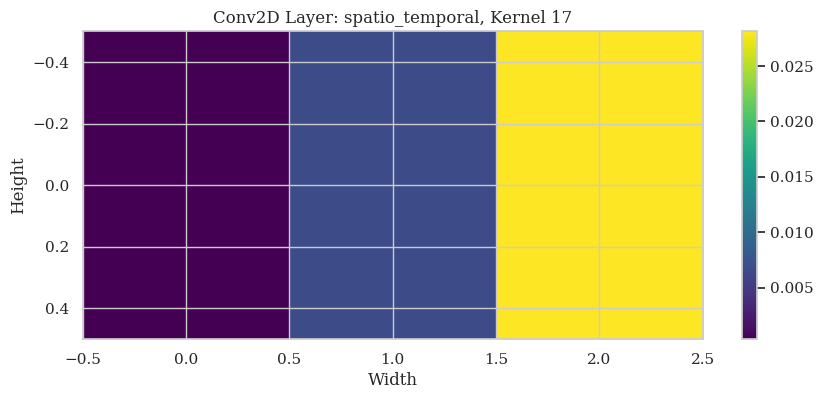

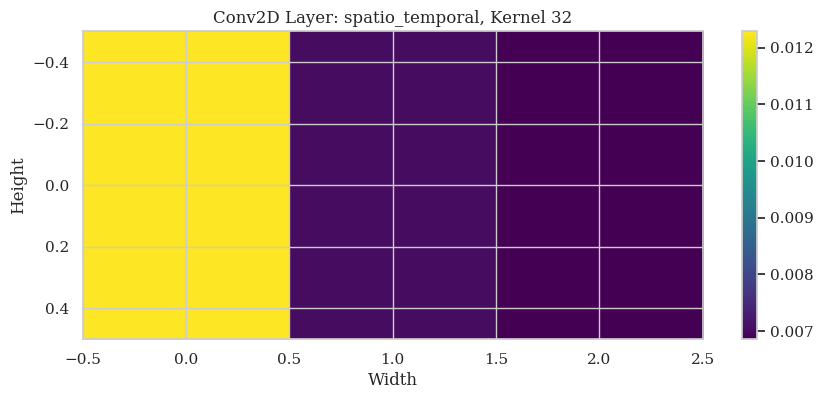

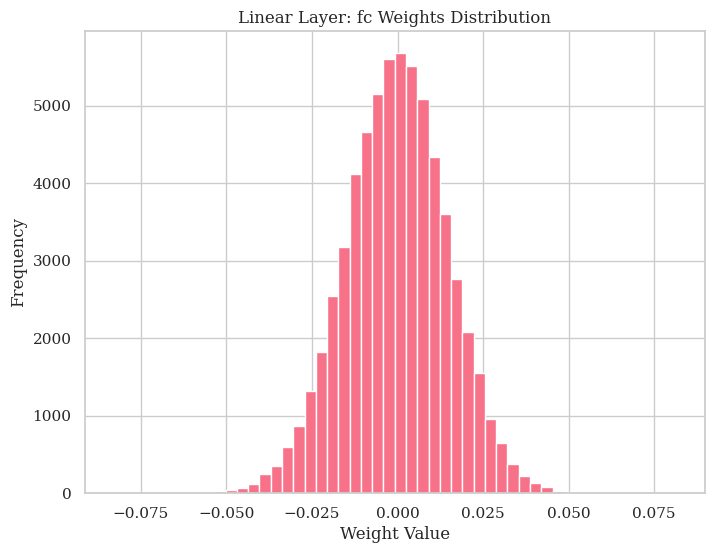

Saving Pytorch model


BNCI2014-001-AllRuns: 100%|██████████| 1/1 [01:03<00:00, 63.76s/it]


      score       time  samples  cross_fold  n_test_samples subject session  \
0  0.517857  46.522236   4140.0         0.0            56.0       1  0train   
1  0.566667  46.522236   4140.0         0.0            60.0       1   1test   
2  0.363636  46.522236   4140.0         0.0            55.0       2  0train   
3  0.245902  46.522236   4140.0         0.0            61.0       2   1test   
4  0.366667  46.522236   4140.0         0.0            60.0       3  0train   

   channels  n_sessions       dataset           pipeline  
0        22           2  BNCI2014-001  SubjectAwareModel  
1        22           2  BNCI2014-001  SubjectAwareModel  
2        22           2  BNCI2014-001  SubjectAwareModel  
3        22           2  BNCI2014-001  SubjectAwareModel  
4        22           2  BNCI2014-001  SubjectAwareModel  


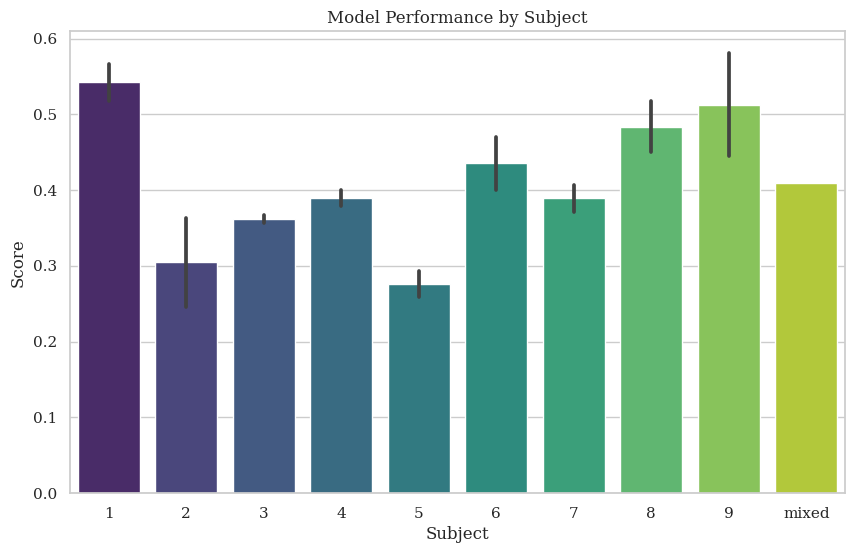

In [4]:
from moabb.evaluations import AllRunsEvaluation, AllRunsEvaluationModified
import pandas as pd

results_list = []
for pipe_name, pipe in pipes.items():
    unique_suffix = f"{pipe_name}_braindecode_example"
    
    evaluation = AllRunsEvaluationModified(
        paradigm=paradigm,
        datasets=[dataset],
        suffix=unique_suffix,
        overwrite=True,
        return_epochs=True,
        random_state=seed,
        n_jobs=1,
        hdf5_path=f"./{pipe_name}_Model.h5",
        save_model=True
    )
    
    # Run the evaluation process for this pipeline
    results = evaluation.process({pipe_name: pipe})

    results_df = pd.DataFrame(results)

    print(results_df.head())
    
    # Plot the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, y="score", x="subject", palette="viridis")
    plt.title("Model Performance by Subject")
    plt.ylabel("Score")
    plt.xlabel("Subject")
    plt.show()
    
    results_list.append(results_df)

# Concatenate all results
results_all = pd.concat(results_list)


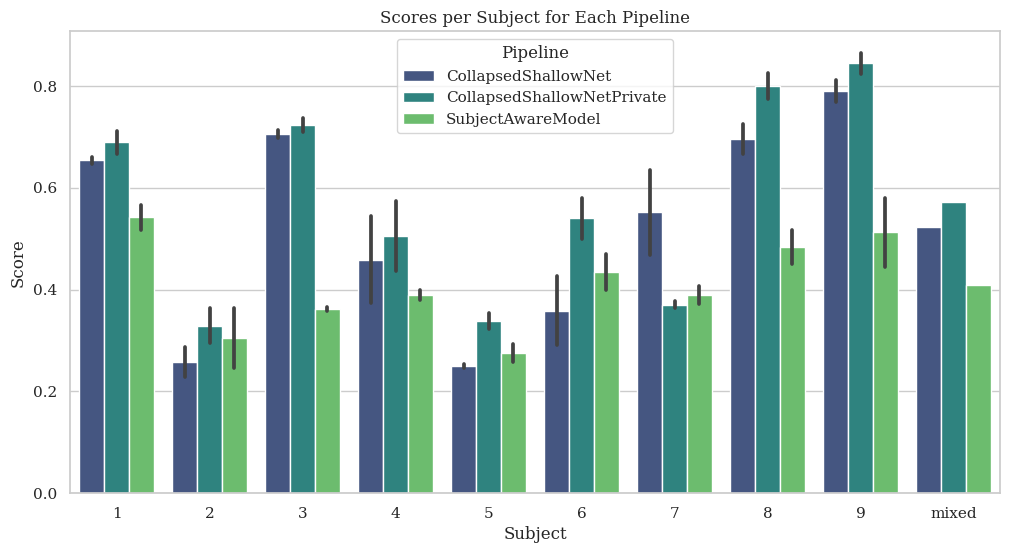

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=results_all, x="subject", y="score", hue="pipeline", palette="viridis")
plt.title("Scores per Subject for Each Pipeline")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.legend(title="Pipeline")
plt.show()
